<a href="https://colab.research.google.com/github/sezinbiner/ClassificationOfCovidXray/blob/feature-extraction-vgg16/BitirmeV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:

import cv2
import os

DATADIR = "/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset" 
classes = ["COVID","Normal"] 

X = []
y = []
i = -1
for class_name in classes: 
  i += 1
  print(class_name)
  path = os.path.join(DATADIR,class_name)
  print(path)
  os.chdir(path) 
  images = os.listdir(path)[:1000]
  for im in images:
      try:
        print(im)
        img = cv2.imread(im, cv2.IMREAD_COLOR) 
        img = cv2.resize(img, (224,224))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        X.append(img) 
        y.append(classes.index(class_name))    
      except Exception as e:
          pass

COVID
/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/COVID
COVID-3348.png
COVID-3361.png
COVID-3325.png
COVID-3335.png
COVID-3359.png
COVID-335.png
COVID-3362.png
COVID-3328.png
COVID-3327.png
COVID-3349.png
COVID-3337.png
COVID-3360.png
COVID-3375.png
COVID-3377.png
COVID-3366.png
COVID-3370.png
COVID-3371.png
COVID-3368.png
COVID-3373.png
COVID-3369.png
COVID-3365.png
COVID-3376.png
COVID-3367.png
COVID-3379.png
COVID-3372.png
COVID-3374.png
COVID-337.png
COVID-3364.png
COVID-3378.png
COVID-3390.png
COVID-3380.png
COVID-3387.png
COVID-3385.png
COVID-3386.png
COVID-339.png
COVID-3381.png
COVID-3382.png
COVID-338.png
COVID-3388.png
COVID-3389.png
COVID-3392.png
COVID-3383.png
COVID-3393.png
COVID-3391.png
COVID-3384.png
COVID-341.png
COVID-3403.png
COVID-3409.png
COVID-3410.png
COVID-3402.png
COVID-3406.png
COVID-340.png
COVID-3394.png
COVID-3404.png
COVID-3401.png
COVID-3397.png
COVID-3408.png
COVID-34.png
COVID-3405.png
COVID-3407.png
COVID-3396.png
COVID-3400.png
COVID-

In [3]:
len(X)

2000

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
X = np.array(X)
y = np.array(y)
X = X/255
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,shuffle=True)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,shuffle=True)

In [5]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_val_one_hot = to_categorical(y_val)

In [6]:
from keras.applications.vgg16 import VGG16
VGG_model = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

58892288/58889256 [==============================] - 1s 0us/step


In [7]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
len(VGG_model.layers)

19

In [9]:
for layer in VGG_model.layers:
  layer.trainable = False
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [10]:
for layer in VGG_model.layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [11]:
feature_extractor = VGG_model.predict(X_train)

In [ ]:
feature_extractor

In [15]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [17]:
features.shape

(1350, 25088)

In [23]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
X_for_RF = features
# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
X_test_feature = VGG_model.predict(X_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [25]:
prediction_RF = RF_model.predict(X_test_features)

Accuracy =  0.925


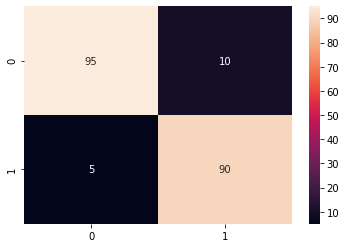

In [27]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

In [34]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
model = models.Sequential()
model.add(tf.keras.Input(shape=features.shape))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.build()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1350, 64)          1605696   
_________________________________________________________________
dense_15 (Dense)             (None, 1350, 4)           260       
_________________________________________________________________
dense_16 (Dense)             (None, 1350, 1)           5         
Total params: 1,605,961
Trainable params: 1,605,961
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(features, y_train, epochs=100, validation_split = 0.2)

Epoch 1/100
34/34 [==============================] - 1s 23ms/step - loss: 0.6935 - accuracy: 0.4942 - val_loss: 0.6941 - val_accuracy: 0.4778
Epoch 2/100
34/34 [==============================] - 1s 19ms/step - loss: 0.6926 - accuracy: 0.5200 - val_loss: 0.6942 - val_accuracy: 0.4778
Epoch 3/100
34/34 [==============================] - 1s 18ms/step - loss: 0.6923 - accuracy: 0.5261 - val_loss: 0.6943 - val_accuracy: 0.4778
Epoch 4/100
34/34 [==============================] - 1s 18ms/step - loss: 0.6922 - accuracy: 0.5272 - val_loss: 0.6944 - val_accuracy: 0.4778
Epoch 5/100
34/34 [==============================] - 1s 19ms/step - loss: 0.6925 - accuracy: 0.5209 - val_loss: 0.6944 - val_accuracy: 0.4778
Epoch 6/100
34/34 [==============================] - 1s 16ms/step - loss: 0.6932 - accuracy: 0.5058 - val_loss: 0.6944 - val_accuracy: 0.4778
Epoch 7/100
34/34 [==============================] - 1s 16ms/step - loss: 0.6938 - accuracy: 0.4909 - val_loss: 0.6944 - val_accuracy: 0.4778
Epoch 